# Unit 01 Task 05
> Federal University of Rio Grande do Norte  
> Technology Center  
> Department of Computer Engineering and Automation  
> Course: **Algorithms and Data Structure II (DCA3702)**  
> Author: **Augusto Matheus Pinheiro Damasceno**  
> Contact
> [augustodamasceno@protonmail.com](mailto:augustodamasceno@protonmail.com)
>
> Copyright (c) 2024, Augusto Damasceno.  
> All rights reserved.   
> SPDX-License-Identifier: BSD-2-Clause

# Libraries

In [153]:
import random
from enum import Enum
from math import log2
from collections import Counter
from itertools import combinations

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
import scipy
import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd
import seaborn as sns


# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = [30, 12]

# Set Pseudo-Random Number Generation Seed for Reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Colors

In [34]:
city_map_colors = {
    "background": "#F5F5F5",          # Light gray for the map background
    "roads": "#8B8B8B",               # Medium gray for roads, providing a subtle yet visible contrast
    "bike_sharing_docks": "#FF5722"   # Bright orange for bike-sharing docks, making them stand out on the map
}

# Get boundary polygons for Natal-RN

ID: 301091


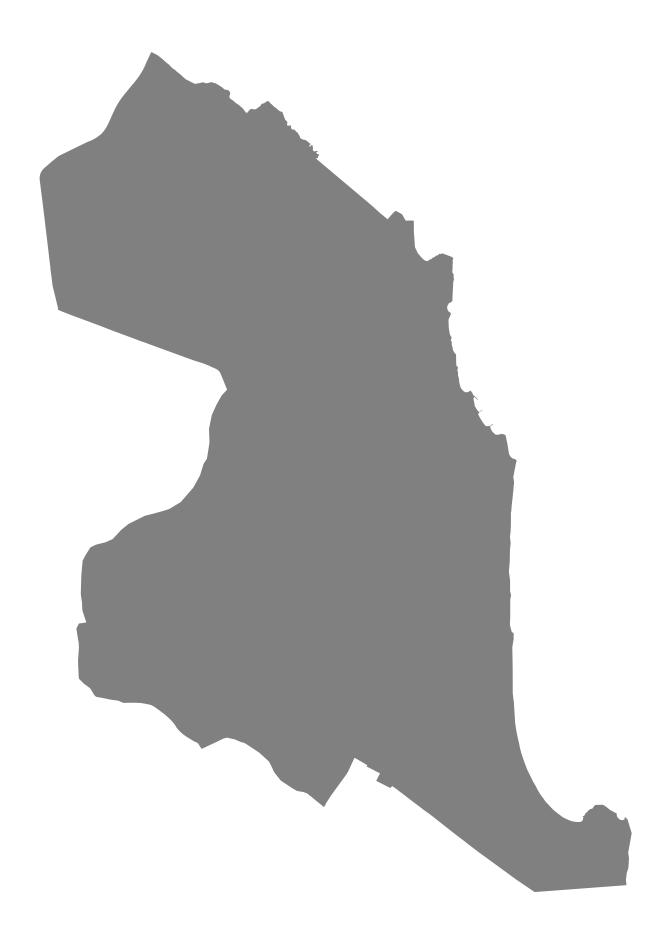

In [36]:
city = ox.geocode_to_gdf('Natal, RN, Brazil')
osmid = city['osm_id'].values[0]
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")
print(f"ID: {osmid}")
plt.savefig('natal_boundaries.jpg')

# Query the Natal-RN Graph

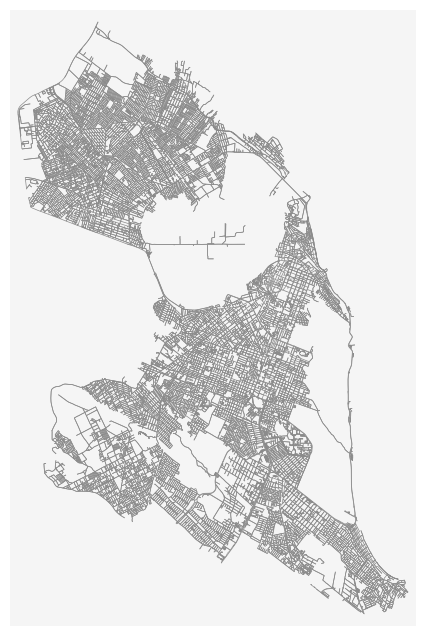

In [37]:
natal = ox.graph_from_place('Natal, RN, Brazil', network_type='bike')
ox.save_graphml(natal, filepath="natal_bicycle_graph.graphml")
fig, ax = ox.plot_graph(natal, node_size=0, edge_color=city_map_colors['roads'], edge_linewidth=0.5, bgcolor=city_map_colors['background'])
fig.savefig('natal_bicycle_graph.jpg')

# Trim Map Around UFRN - 2 KM

## Google Maps URL https://maps.app.goo.gl/9Vkd2y5ge2Bkqm7o7

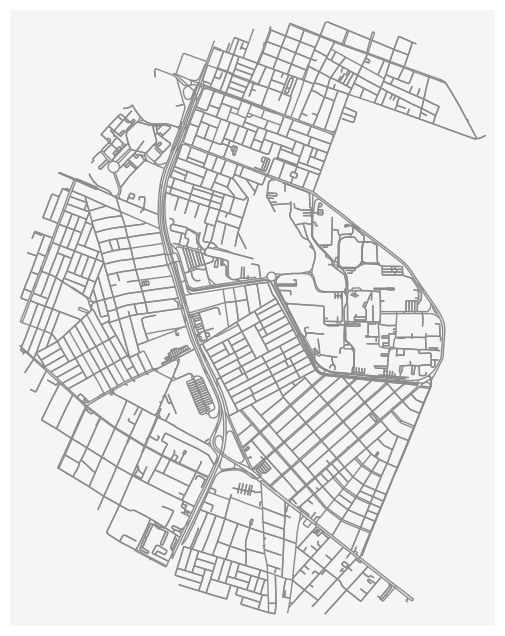

In [112]:
latitude, longitude = -5.8402401,-35.2029508
buffer_distance = 2000 

center_point = gpd.GeoDataFrame(geometry=[Point(longitude, latitude)], crs="EPSG:4326")
center_point_utm = center_point.to_crs(center_point.estimate_utm_crs())
buffer_area = center_point_utm.buffer(buffer_distance)
buffer_area = buffer_area.to_crs("EPSG:4326")
buffer_polygon = buffer_area.geometry[0]
ufrn = ox.graph_from_polygon(buffer_polygon, network_type="bike")
fig, ax = ox.plot_graph(ufrn, 
                        node_size=0, 
                        edge_linewidth=1, 
                        edge_color=city_map_colors['roads'],
                        bgcolor=city_map_colors['background'])
fig.savefig('ufrn_bicycle_graph.jpg')

# Degree Centrality

In [113]:
degree_centrality = nx.degree_centrality(ufrn)

In [114]:
min_degree_key = min(degree_centrality, key=degree_centrality.get)
min_degree = degree_centrality[min_degree_key]
max_degree_key = max(degree_centrality, key=degree_centrality.get)
max_degree = degree_centrality[max_degree_key]
print(f'Min Degree = {min_degree} from {min_degree_key} and Max Degree = {max_degree} from {max_degree_key}')

Min Degree = 0.00041050903119868636 from 501801938 and Max Degree = 0.003284072249589491 from 501006398


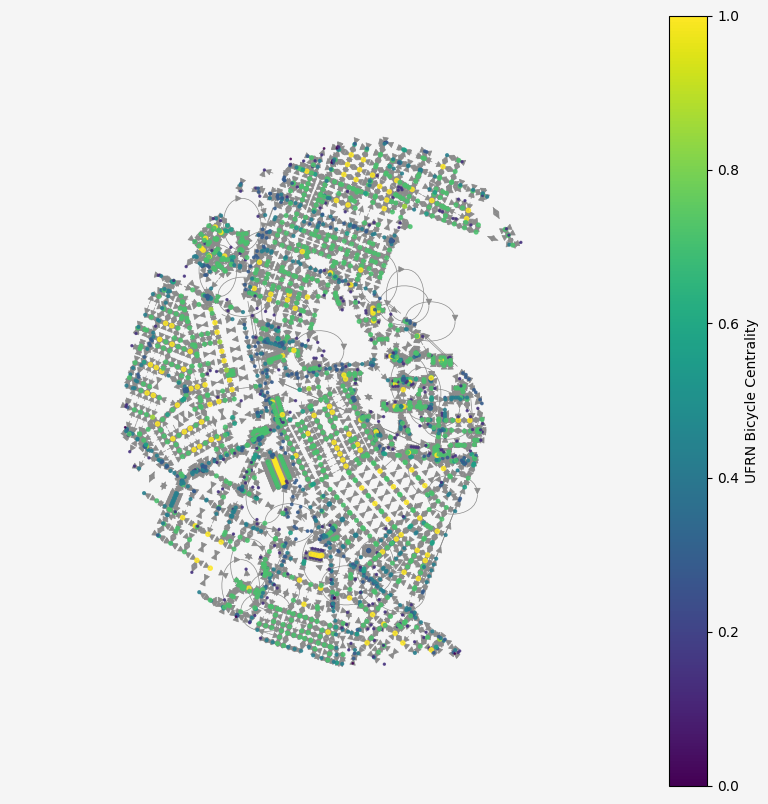

In [124]:
pos = {node: (data['x'], data['y']) for node, data in ufrn.nodes(data=True)}

node_color = [degree_centrality[node] for node in ufrn.nodes()]
node_size = [int(v * 3000) for v in degree_centrality.values()]

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor(city_map_colors['background'])

nx.draw_networkx_edges(ufrn, pos, ax=ax, edge_color=city_map_colors['roads'], width=0.5)
nx.draw_networkx_nodes(ufrn, pos, ax=ax, node_size=node_size, node_color=node_color, cmap='viridis', alpha=0.8)
ax.axis("off")

plt.savefig('ufrn_bicycle_centrality.jpg', dpi=300, bbox_inches='tight')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label="UFRN Bicycle Centrality")
plt.show()

# Closeness centrality

In [125]:
closeness_centrality = nx.closeness_centrality(ufrn)

In [126]:
min_closeness_key = min(closeness_centrality, key=closeness_centrality.get)
min_closeness = closeness_centrality[min_closeness_key]
max_closeness_key = max(closeness_centrality, key=closeness_centrality.get)
max_closeness = closeness_centrality[max_closeness_key]
print(f'Min Closeness Degree = {min_closeness} from {min_closeness_key} and Max Closeness Degree = {max_closeness} from {max_closeness_key}')

Min Closeness Degree = 0.0 from 501801938 and Max Closeness Degree = 0.04371286127430822 from 7244035031


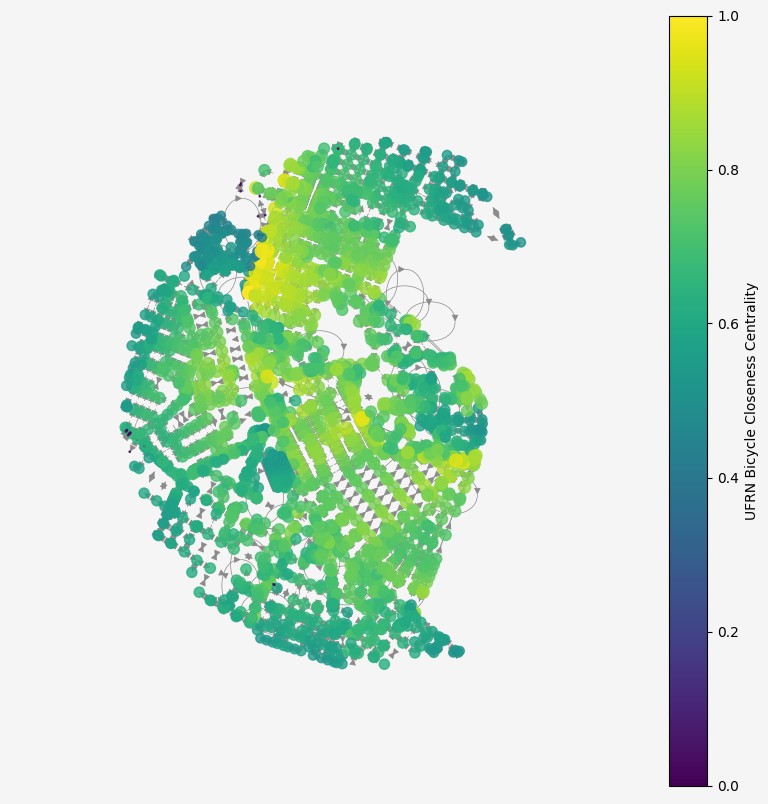

In [128]:
pos = {node: (data['x'], data['y']) for node, data in ufrn.nodes(data=True)}

node_color = [closeness_centrality[node] for node in ufrn.nodes()]
node_size = [int(v*2000) for v in closeness_centrality.values()]

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor(city_map_colors['background'])

nx.draw_networkx_edges(ufrn, pos, ax=ax, edge_color=city_map_colors['roads'], width=0.5)
nx.draw_networkx_nodes(ufrn, pos, ax=ax, node_size=node_size, node_color=node_color, cmap='viridis', alpha=0.8)
ax.axis("off")

plt.savefig('ufrn_bicycle_closeness_centrality.jpg', dpi=300, bbox_inches='tight')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label="UFRN Bicycle Closeness Centrality")
plt.show()

# Betweenness Centrality

In [129]:
betweenness_centrality = nx.betweenness_centrality(ufrn)

In [131]:
min_betweenness_centrality_key = min(betweenness_centrality, key=betweenness_centrality.get)
min_betweennes = betweenness_centrality[min_betweenness_centrality_key]
max_betweenness_centrality_key = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweennes = betweenness_centrality[max_betweenness_centrality_key]
print(f'Min Betweennes Degree = {min_betweennes} from {min_betweenness_centrality_key} and Max Betweennes Degree = {max_betweennes} from {max_betweenness_centrality_key}')

Min Betweennes Degree = 0.0 from 501118518 and Max Betweennes Degree = 0.17363754238823947 from 560206858


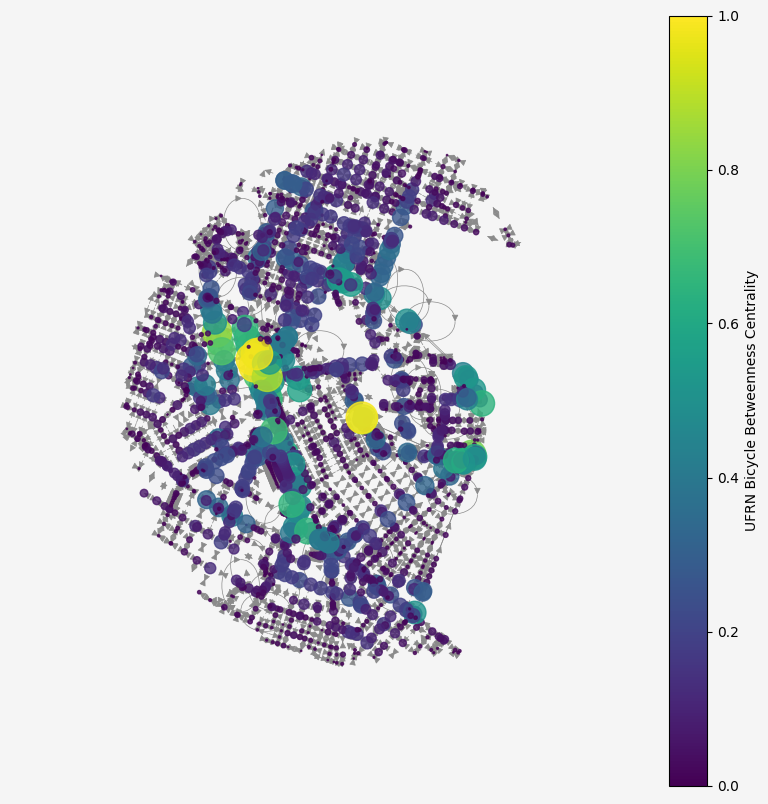

In [132]:
pos = {node: (data['x'], data['y']) for node, data in ufrn.nodes(data=True)}

node_color = [betweenness_centrality[node] for node in ufrn.nodes()]
node_size = [int(v*3000) for v in betweenness_centrality.values()]

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor(city_map_colors['background'])

nx.draw_networkx_edges(ufrn, pos, ax=ax, edge_color=city_map_colors['roads'], width=0.5)
nx.draw_networkx_nodes(ufrn, pos, ax=ax, node_size=node_size, node_color=node_color, cmap='viridis', alpha=0.8)
ax.axis("off")

plt.savefig('ufrn_bicycle_betweenness_centrality.jpg', dpi=300, bbox_inches='tight')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label="UFRN Bicycle Betweenness Centrality")
plt.show()

# Eigenvector Centrality

In [138]:
eigenvector_centrality = nx.eigenvector_centrality(nx.DiGraph(ufrn), max_iter=1000)

In [139]:
min_eigenvector_centrality_key = min(eigenvector_centrality, key=eigenvector_centrality.get)
min_eigenvector = eigenvector_centrality[min_eigenvector_centrality_key]
max_eigenvector_centrality_key = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector = eigenvector_centrality[max_eigenvector_centrality_key]
print(f'Min Eigenvector Score = {min_betweennes} from {min_eigenvector_centrality_key} and Max Eigenvector Score = {max_betweennes} from {max_eigenvector_centrality_key}')

Min Eigenvector Score = 0.0 from 501801938 and Max Eigenvector Score = 0.17363754238823947 from 501834691


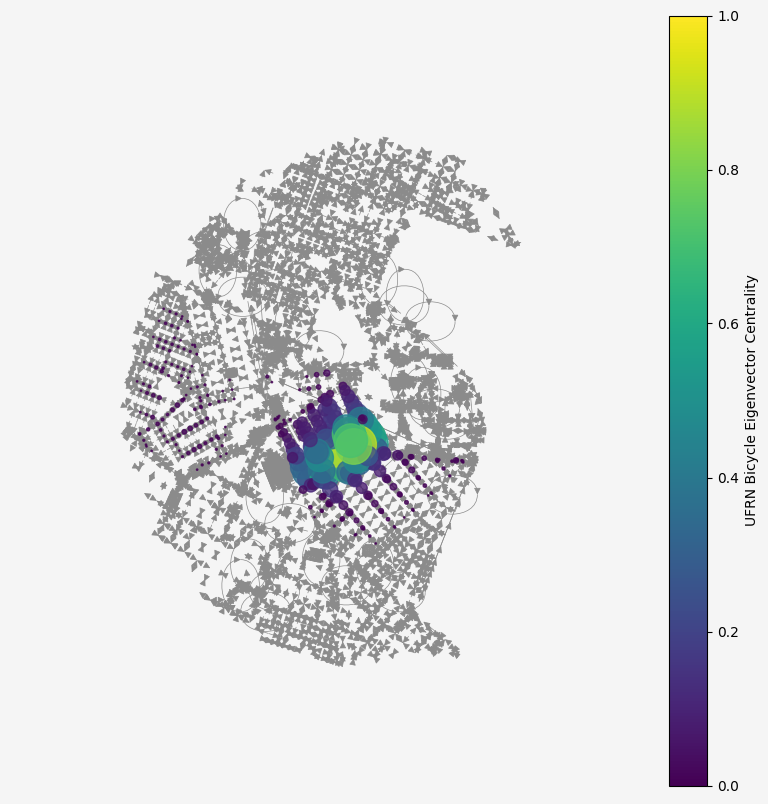

In [140]:
pos = {node: (data['x'], data['y']) for node, data in ufrn.nodes(data=True)}

node_color = [eigenvector_centrality[node] for node in ufrn.nodes()]
node_size = [int(v*3000) for v in eigenvector_centrality.values()]

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor(city_map_colors['background'])

nx.draw_networkx_edges(ufrn, pos, ax=ax, edge_color=city_map_colors['roads'], width=0.5)
nx.draw_networkx_nodes(ufrn, pos, ax=ax, node_size=node_size, node_color=node_color, cmap='viridis', alpha=0.8)
ax.axis("off")

plt.savefig('ufrn_bicycle_eigenvector_centrality.jpg', dpi=300, bbox_inches='tight')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label="UFRN Bicycle Eigenvector Centrality")
plt.show()

# Probability Density Function

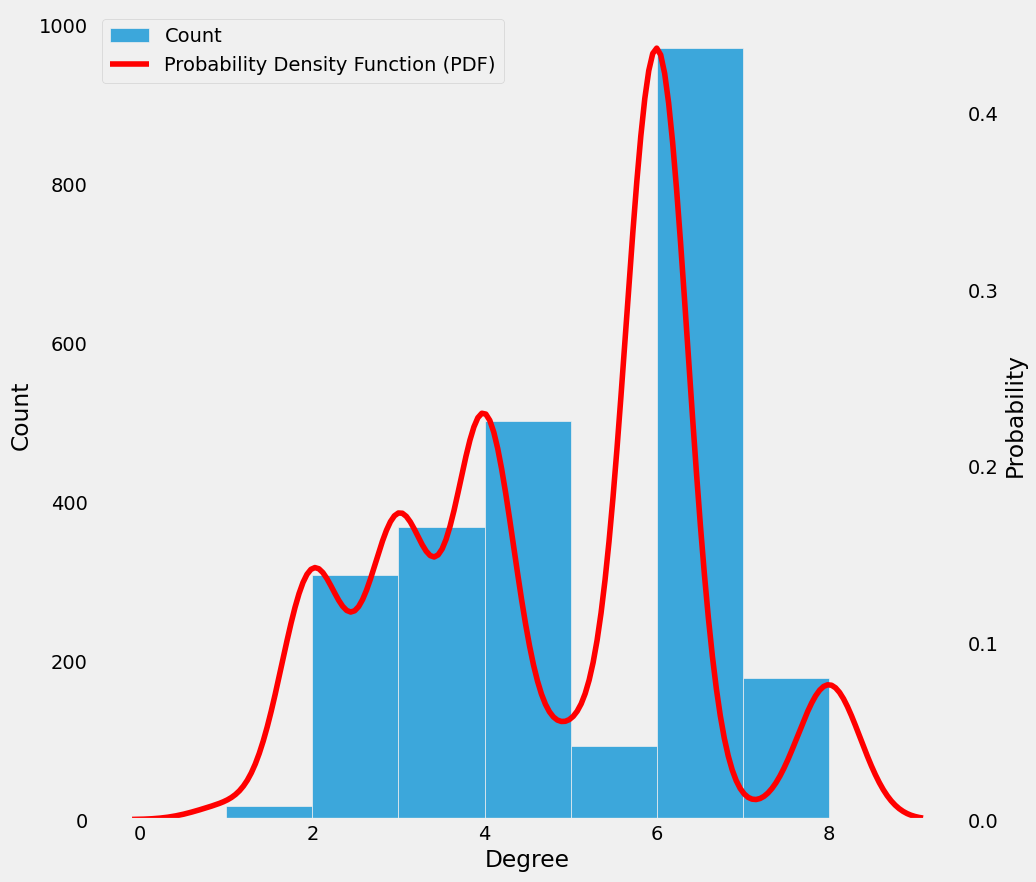

In [143]:
degree_sequence = sorted([d for n, d in ufrn.degree()], reverse=True)

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('ufrn_bicycle_probability_density_function.jpg', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Cumulative Density Function

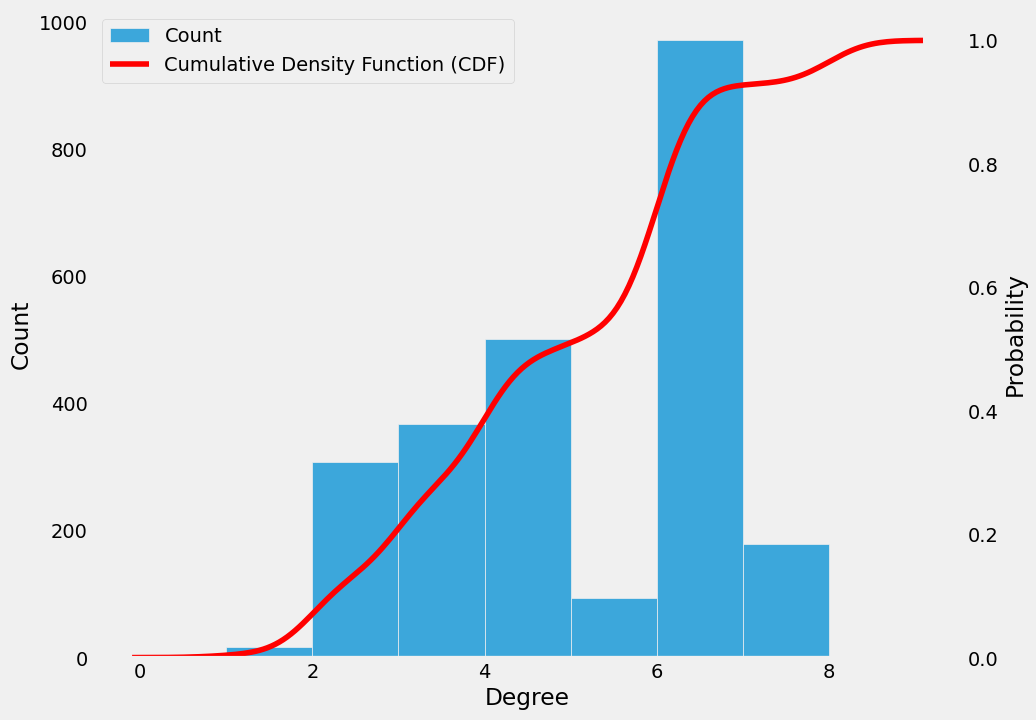

In [146]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('ufrn_bicycle_cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Multivariate Analysis 

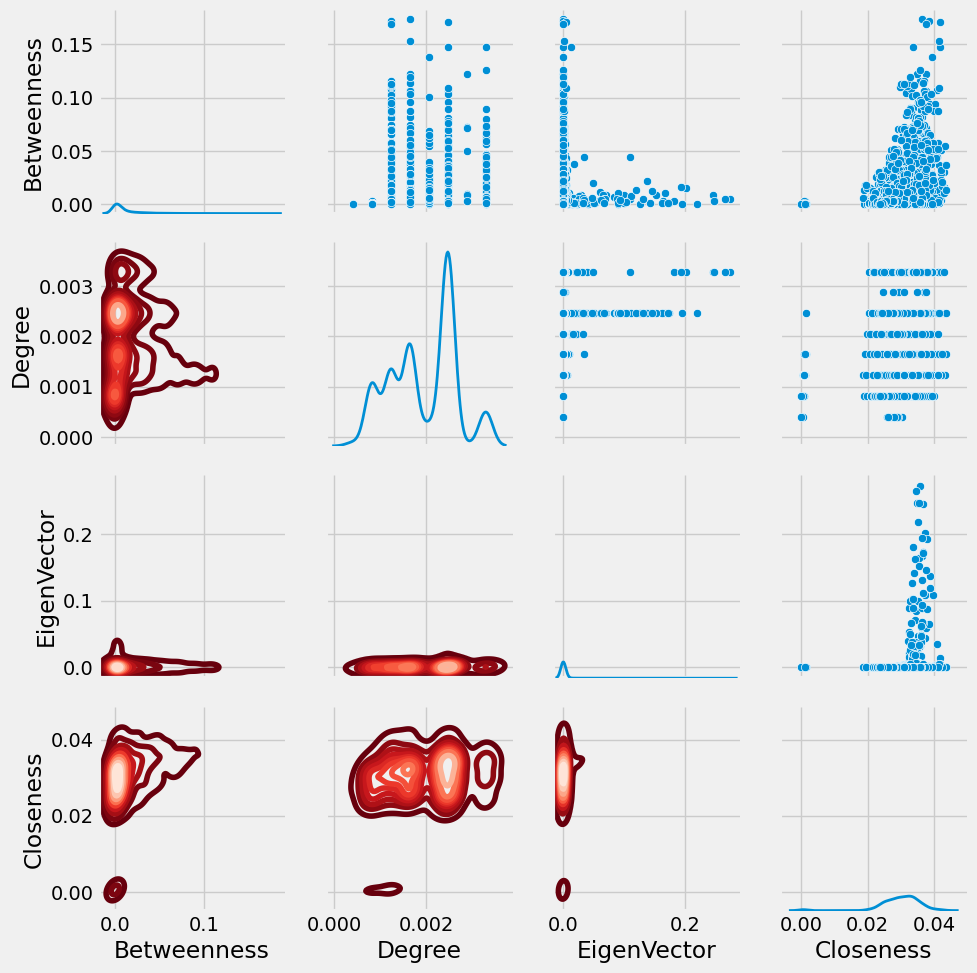

In [148]:
df = pd.DataFrame.from_dict({"Betweenness": betweenness_centrality,
                            "Degree": degree_centrality,
                            "EigenVector": eigenvector_centrality,
                            "Closeness": closeness_centrality})
df.reset_index(inplace=True,drop=True)
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)
fig.savefig('ufrn_bicycle_multivariate_analysis.png', transparent=True,dpi=600,bbox_inches="tight")
df.to_csv('ufrn_bicycle_multivariate_analysis.csv')

# Best Locations

In [152]:
df['Betweenness_Norm'] = (df['Betweenness'] - df['Betweenness'].min()) / (df['Betweenness'].max() - df['Betweenness'].min())
df['Closeness_Norm'] = (df['Closeness'] - df['Closeness'].min()) / (df['Closeness'].max() - df['Closeness'].min())
df['EigenVector_Norm'] = (df['EigenVector'] - df['EigenVector'].min()) / (df['EigenVector'].max() - df['EigenVector'].min())
df['Combined_Score'] = df['Betweenness_Norm'] + df['Closeness_Norm'] + df['EigenVector_Norm']
best_locations = df.sort_values(by='Combined_Score', ascending=False).head(10)
best_locations.to_csv('ufrn_bicycle_best_locations.csv')
best_locations

,Betweenness,Degree,EigenVector,Closeness,Betweenness_Norm,Closeness_Norm,EigenVector_Norm,Combined_Score
1817,0.171103,0.002463,4.568795e-03,0.041931,0.985403,0.959244,0.016736,1.961384
1484,0.172260,0.001232,3.139671e-05,0.038672,0.992066,0.884686,0.000115,1.876866
1802,0.147734,0.002463,1.351913e-02,0.041920,0.850816,0.958992,0.049524,1.859332
613,0.172256,0.001232,9.814295e-06,0.037223,0.992044,0.851537,0.000036,1.843618
135,0.004690,0.003284,2.729841e-01,0.035680,0.027008,0.816224,1.000000,1.843232
1884,0.153315,0.001642,1.399418e-03,0.041581,0.882961,0.951237,0.005126,1.839325
1915,0.169596,0.001232,2.529338e-06,0.037601,0.976726,0.860183,0.000009,1.836917
1072,0.173638,0.001642,9.674841e-07,0.036321,1.000000,0.830911,0.000004,1.830914
160,0.008741,0.003284,2.448128e-01,0.036797,0.050339,0.841795,0.896802,1.788936
143,0.004601,0.003284,2.642947e-01,0.034630,0.026497,0.792219,0.968169,1.786885


# References

1. IVANOVITCHM. **DataStructure**. GitHub repository. Available at: <https://github.com/ivanovitchm/datastructure>. Accessed on: 08 Oct. 2024.

2. COSCIA, Michele. **The Atlas For The Aspiring Network Scientist**. 1st ed. 2021. Copyright © 2021 Michele Coscia. Available at: <https://www.networkatlas.eu>. Accessed on: 08 Oct. 2024.

3. PYTHON. Python.org. Available at: <https://www.python.org/>. Accessed on: 08 Oct. 2024.

4. PIP. Pip - Getting Started. Available at: <https://pip.pypa.io/en/stable/getting-started/>. Accessed on: 08 Oct. 2024.

5. NUMPY. NumPy - The fundamental package for array computing with Python. Available at: <https://numpy.org/>. Accessed on: 08 Oct. 2024.

6. PANDAS. Pandas - Python Data Analysis Library. Available at: <https://pandas.pydata.org/>. Accessed on: 08 Oct. 2024.

7. JUPYTER. Jupyter - Project Jupyter. Available at: <https://jupyter.org/>. Accessed on: 08 Oct. 2024.

8. **Python Standard Library - `random` module**  
   PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Random — Generate pseudo-random numbers. Available at: <https://docs.python.org/3/library/random.html>. Accessed on: 08 Oct. 2024.

9. **Python Standard Library - `enum` module**  
   PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Enum — Support for enumerations. Available at: <https://docs.python.org/3/library/enum.html>. Accessed on: 08 Oct. 2024.

10. **Plotly Library**  
   PLOTLY TECHNOLOGIES INC. Plotly Graphing Libraries. Available at: <https://plotly.com/python/>. Accessed on: 08 Oct. 2024.
11. **Matplotlib Library**  
   HUNTER, J. D. Matplotlib: A 2D graphics environment. Computing in Science & Engineering, v. 9, p. 90-95, 2007. Available at: <https://matplotlib.org/>. Accessed on: 08 Oct. 2024.

12. **The Story Behind Random Seed 42**  
   GEEKCULTURE. The story behind random seed 42 in machine learning. Available at: <https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a>. Accessed on: 08 Oct. 2024.

13. **Math Library**  
   Available at: https://docs.python.org/3/library/math.html.  Accessed on: 08 Oct. 2024.

14. **Collections Library**  
   Available at: https://docs.python.org/3/library/collections.html. Accessed on: 08 Oct. 2024.

15. **Networkx Library**
    Hagberg, A., Schult, D., & Swart, P. NetworkX: Python Software for the Creation, Manipulation, 
    and Study of the Structure, Dynamics, and Functions of Complex Networks. Available at: https://networkx.github.io/. Accessed on: 08 Oct. 2024.

16. PYTHON SOFTWARE FOUNDATION. Python 3.10 Documentation: Itertools — Functions creating iterators for efficient looping. Available at: <https://docs.python.org/3/library/itertools.html>. Accessed on: 08 Oct. 2024.

17. **nxviz Library**: Visualizing Network Data in Python. Available at: <https://nxviz.readthedocs.io/>. Accessed on: 08 Oct. 2024.

18. VIRTANEN, Pauli et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature Methods, v. 17, p. 261–272, 2020. Available at: <https://scipy.org/>. Accessed on: 08 Oct. 2024.

19. Waskom, Michael. nxviz: A package for visualizing data with network diagrams in Python. Version 0.6.1. 2024. Available at: https://github.com/ericmjl/nxviz. Accessed on: 08 Oct. 2024.

20. BOEING, G. Modeling and Analyzing Urban Networks and Amenities with OSMnx. 2024. Working paper. Available at: https://geoffboeing.com/publications/osmnx-paper/. Accessed on: 5 Nov. 2024.

21. BOEING, G. OSMnx. Available at: https://github.com/gboeing/osmnx. Accessed on: 5 Nov. 2024.